<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-team_59/blob/main/Actividad_Sem_04_CD_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# **Parte 1: Ejercicio guiado**
> * Revise el ejercicio guiado para el análisis de componentes principales utilizando el conjunto de datos.
---
---

---
# **PASO 1:** Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos
> * Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.
---

# Dimension Reduction

In [ ]:
# - - - - - - - - - - - - 
import pandas as pd
import numpy as np

# Principal components analysis (PCA) 

* It is a useful method for dimension reduction, especially when the number of variables is large.
* PCA is intended for use with numerical variables. 
   * For categorical variables, other methods such as correspondence analysis are more suitable. 

In [ ]:
# - - - - - - - - - - - - 
Credit = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [ ]:
# - - - - - - - - - - - - 
credit_df = pd.read_csv(Credit, index_col = 0)
df = credit_df.copy()
df.index.name =None
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [ ]:
# - - - - - - - - - - - - 
# Quitamos los valores nan, sabemos por el análisis de la semana pasada que estos valores tienen un porcentaje
# mínimo, por lo tanto los imputamos con 0
df.fillna(0, inplace=True)

In [ ]:
# - - - - - - - - - - - - 
df.shape

(30000, 24)

Se realiza una revisión de la descripción de la BD que se encuentra en la siguiente liga: https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt 

Con esta información identificamos las variables Categóricas y Numéricas:

* **X1**: Monto del crédito otorgado (dólar NT), incluye tanto el crédito de consumo individual como su crédito familiar (complementario).
* X2: Sexo (1 = hombre; 2 = mujer).
* X3: Educación (1 = posgrado; 2 = universidad; 3 = secundaria; 4 = otros).
* X4: Estado civil (1 = casado; 2 = soltero; 3 = otros).
* X5: Edad (año).

X6 - X11: Historial de pagos pasados a partir del seguimiento de los registros de pagos mensuales pasados ​​de abril a septiembre del 2005.
* X6 = Estado de pago en septiembre de 2005.
* X7 = El estado de pago en agosto de 2005.
* X8 = El estado de pago en julio de 2005.
* X9 = El estado de pago en junio de 2005.
* X10 = El estado de pago en mayo de 2005.
* X11 = Estado de amortización en abril de 2005 (escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más).

X12-X17: Importe del estado de cuenta (dólar NT).
* **X12** = monto del estado de cuenta en septiembre de 2005.
* **X13** = monto del estado de cuenta en agosto de 2005.
* **X17** = monto del estado de cuenta en abril de 2005.

X18-X23: Monto del pago anterior (dólar NT).
* **X18** = monto pagado en septiembre de 2005.
* **X19** = monto pagado en agosto de 2005.
* **X20** = monto pagado en julio de 2005.
* **X21** = monto pagado en junio de 2005.
* **X22** = monto pagado en mayo de 2005.
* **X23** = monto pagado en abril de 2005.

In [ ]:
# - - - - - - - - - - - - - - - - - - 
# Se muestra el rango para realizar la normalización para comparar con el ejercicio final
ndf = df.copy()
ndfRange = ndf.max() - ndf.min()
print('ndfRange:\n',ndfRange)

ndfRange:
 X1      990000.0
X2           2.0
X3           6.0
X4           3.0
X5          79.0
X6          10.0
X7          10.0
X8          10.0
X9          10.0
X10         10.0
X11         10.0
X12    1130091.0
X13    1053708.0
X14    1821353.0
X15    1061586.0
X16    1008505.0
X17    1301267.0
X18     873552.0
X19    1684259.0
X20     896040.0
X21     621000.0
X22     426529.0
X23     528666.0
Y            1.0
dtype: float64


In [ ]:
# - - - - - - - - - - - - - - - - 
# Normalización sobre nfd para comparar con el ejercicio final
# En el ejercicio final no se ejecuta
#ndf = ((ndf-ndf.min())/ndfRange).round(4)
ndf

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


# Variables categóricas:

X2, X3, X4, **X5**, X6, X7, X8, X9, x10, X11

# Variables numéricas

X1, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23

In [ ]:
# Obtenemos la correlación del data frame ndf para ver todas las relaciones con variables categóricas y numéricas
ndf.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
X1,1.000000,0.024771,-0.218965,-0.108025,0.144215,-0.271257,-0.296455,-0.286249,-0.267404,-0.249432,...,0.294058,0.295625,0.290397,0.195279,0.178407,0.210111,0.203246,0.217150,0.219597,-0.153449
X2,0.024771,1.000000,0.014700,-0.031016,-0.090460,-0.057710,-0.070873,-0.065976,-0.060114,-0.055080,...,-0.021739,-0.016875,-0.016662,-0.000066,-0.001349,-0.008480,-0.002168,-0.001588,-0.002751,-0.039821
X3,-0.218965,0.014700,1.000000,-0.142844,0.175642,0.105362,0.121542,0.114042,0.108809,0.097465,...,-0.000347,-0.007470,-0.008984,-0.037410,-0.029982,-0.039896,-0.038220,-0.040289,-0.037125,0.028226
X4,-0.108025,-0.031016,-0.142844,1.000000,-0.413097,0.019905,0.024198,0.032515,0.032990,0.035483,...,-0.023201,-0.025263,-0.021124,-0.005811,-0.008042,-0.003429,-0.012606,-0.001119,-0.006603,-0.024181
X5,0.144215,-0.090460,0.175642,-0.413097,1.000000,-0.039289,-0.050074,-0.052973,-0.049704,-0.053630,...,0.051416,0.049354,0.047760,0.025514,0.021704,0.029101,0.021287,0.022414,0.019462,0.013833
X6,-0.271257,-0.057710,0.105362,0.019905,-0.039289,1.000000,0.672132,0.574452,0.538835,0.509271,...,0.179003,0.180498,0.176904,-0.079258,-0.070111,-0.070478,-0.064004,-0.058160,-0.058697,0.324644
X7,-0.296455,-0.070873,0.121542,0.024198,-0.050074,0.672132,1.000000,0.766738,0.662086,0.622716,...,0.222120,0.221134,0.219324,-0.080706,-0.059002,-0.055834,-0.046867,-0.037041,-0.036527,0.263452
X8,-0.286249,-0.065976,0.114042,0.032515,-0.052973,0.574452,0.766738,1.000000,0.776619,0.685996,...,0.227268,0.225133,0.222401,0.001162,-0.066808,-0.053315,-0.046053,-0.035840,-0.035869,0.235449
X9,-0.267404,-0.060114,0.108809,0.032990,-0.049704,0.538835,0.662086,0.776619,1.000000,0.819933,...,0.245918,0.242833,0.239162,-0.009352,-0.001931,-0.069195,-0.043432,-0.033631,-0.026557,0.216394
X10,-0.249432,-0.055080,0.097465,0.035483,-0.053630,0.509271,0.622716,0.685996,0.819933,1.000000,...,0.271676,0.269464,0.262285,-0.006128,-0.003220,0.008991,-0.058300,-0.033372,-0.023036,0.203889


In [ ]:
# Eliminamos las variables categóricas 
VarCat = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y']
ndf = ndf.drop(columns=VarCat)

In [ ]:
# Obtenemos la correlación del data frame ndf sin las variables categóricas
ndfc = ndf.corr()
ndfc

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
X1,1.000000,0.144215,0.285484,0.278358,0.283317,0.294058,0.295625,0.290397,0.195279,0.178407,0.210111,0.203246,0.217150,0.219597
X5,0.144215,1.000000,0.056501,0.054389,0.053811,0.051416,0.049354,0.047760,0.025514,0.021704,0.029101,0.021287,0.022414,0.019462
X12,0.285484,0.056501,1.000000,0.951489,0.892261,0.860276,0.829780,0.802663,0.140341,0.099377,0.156953,0.158338,0.167073,0.179353
X13,0.278358,0.054389,0.951489,1.000000,0.928321,0.892479,0.859774,0.831604,0.280421,0.100873,0.150768,0.147437,0.158001,0.174272
X14,0.283317,0.053811,0.892261,0.928321,1.000000,0.923961,0.883904,0.853332,0.244410,0.316954,0.130080,0.143450,0.179767,0.182348
X15,0.294058,0.051416,0.860276,0.892479,0.923961,1.000000,0.940137,0.900950,0.233084,0.207586,0.300066,0.130242,0.160481,0.177661
X16,0.295625,0.049354,0.829780,0.859774,0.883904,0.940137,1.000000,0.946172,0.217134,0.181275,0.252359,0.293146,0.141635,0.164216
X17,0.290397,0.047760,0.802663,0.831604,0.853332,0.900950,0.946172,1.000000,0.200049,0.172681,0.233813,0.250270,0.307758,0.115508
X18,0.195279,0.025514,0.140341,0.280421,0.244410,0.233084,0.217134,0.200049,1.000000,0.285620,0.252226,0.199617,0.148499,0.185780
X19,0.178407,0.021704,0.099377,0.100873,0.316954,0.207586,0.181275,0.172681,0.285620,1.000000,0.244788,0.180121,0.180918,0.157639


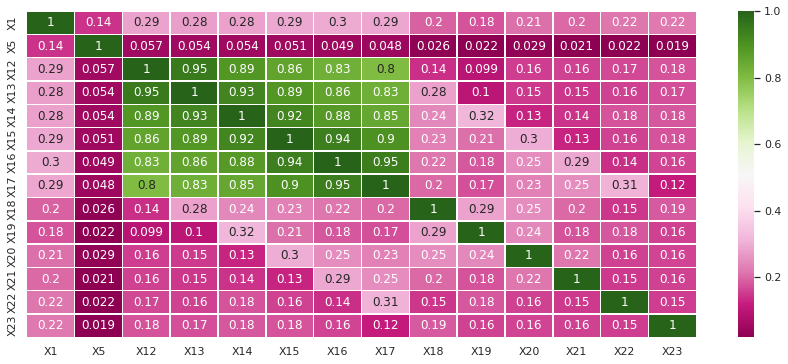

In [ ]:
# Creamos la matriz de correlación para ver de forma más sencilla la correlación 
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set(rc={'figure.figsize':(15,6)}) 
sns.heatmap(ndfc, annot=True, linewidths=.5, linecolor='white', cmap="PiYG")
plt.show()

Principal Component Analysis can tell you what variables in your data are the most important. 

We focus first on two variables: `X12` and `X13`: 

In [ ]:
# - - - - - - - - - - - - 
ndfs = ndf[['X13', 'X12']]
ndfs.corr()

,X13,X12
X13,1.000000,0.951489
X12,0.951489,1.000000


In [ ]:
# - - - - - - - - - - - - 
Varience = np.cov([ndfs.X12, ndfs.X13])
Varience

array([[5.42259185e+09, 4.98705585e+09],
       [4.98705585e+09, 5.06610327e+09]])

In [ ]:
Varience[0,0]

5422591854.496558

In [ ]:
# - - - - - - - - - - - -
#ndfcs = ndfc[['X12','X13']]
ndfs.var().sum()

10488695120.892206

In [ ]:
ndfs.X12.mean().round(2)

51218.08

In [ ]:
ndfs.X13.mean().round(2)

49172.7

In [ ]:
# - - - - - - - - - - - -
t= ndfs.var().sum()
t

10488695120.892206

In [ ]:
# - - - - - - - - - - - -
varC = Varience[0][0]
varR = Varience[1][1]

In [ ]:
print('Total Varience \t\t:', t.round(2) )
print('Varience prop. of X12 \t:', ((varC/t)*100).round(2),'%' )
print('Varience prop. of X13 \t:', ((varR/t)*100).round(2),'%' )

Total Varience 		: 10488695120.89
Varience prop. of X12 	: 51.7 %
Varience prop. of X13 	: 48.3 %


If we drop `X13` for the sake of dimension reduction, we  lose at least 48.3% of the total variability. 

In [ ]:
ndfs.corr().round(2)

,X13,X12
X13,1.00,0.95
X12,0.95,1.00


Roughly speaking, **95%** of the total variation in both variables is actually “co-variation,” or variation in one variable that is duplicated by similar variation in the other variable. 

Can we use this fact to reduce the number of variables, while making maximum use of their unique contributions to the overall variation? 

Since there is redundancy in the information that the two variables contain, it might be possible to reduce the `two variables` to a `single variable` `without losing` `too much` information. 

The idea in PCA is to find a linear combination of the two variables that contains most, even if not all, of the information, so that this new variable can replace the two original variables.  

The line `z1 (first principal component = PC1)` is the direction in which the variability of the points is largest. 

The `z2 (second principal component = PC2)`-axis is chosen to be perpendicular to the z1-axis.  

In [ ]:
import seaborn as sns

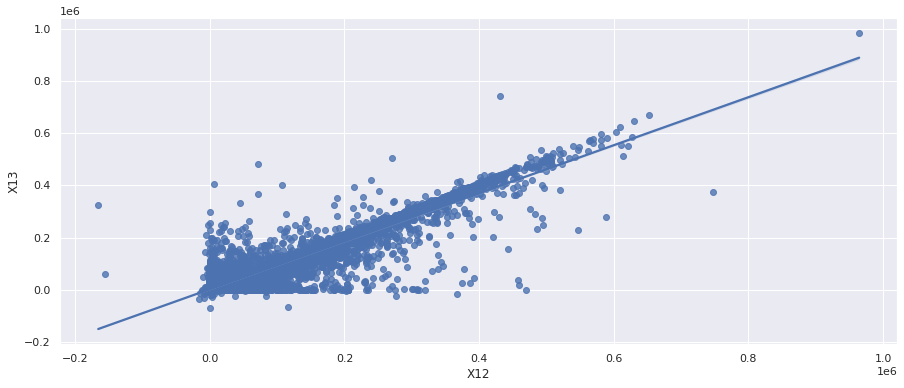

In [ ]:
p = sns.regplot(data = ndf,  
                x = ndf['X12'], 
                y = ndf['X13']
               ) 
p

---
---

The weights for z1 are given by (0.7196, 0.6944): Means, when x axis move 0.7196, y axis move 0.6944 along regression (line fit) line. 

---
---


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
pcs = PCA(n_components=2)

pcs.fit(ndf[['X12', 'X13']])

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,101166.139334,0.975773,0.975773
1,15940.745691,0.024227,1.000000


In [ ]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(4)

,0,1
Standard deviation,101166.1393,15940.7457
Proportion of variance,0.9758,0.0242
Cumulative proportion,0.9758,1.0000


In [ ]:
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,101166.1393,15940.7457
Proportion of variance,0.9758,0.0242
Cumulative proportion,0.9758,1.0000


The summary gives the reallocated variance: 
* `z1` accounts for 97.58% of the total variability and 
* `z2` for the remaining 0.24%. 

Therefore, if we drop `z2 = PC2`, we still maintain 97.58% of the total variability. 

https://www.youtube.com/watch?v=FgakZw6K1QQ 

### Scree Plot

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

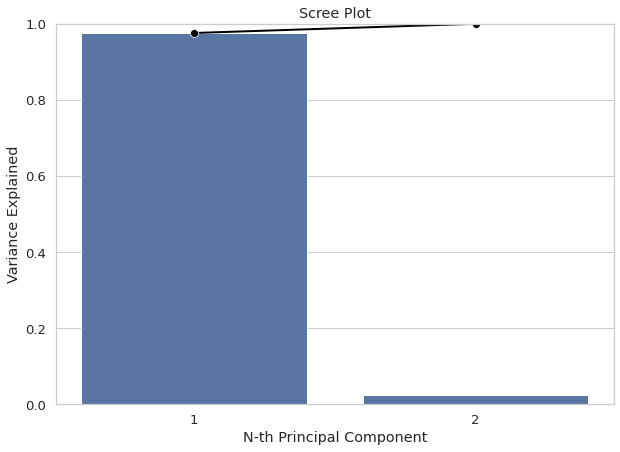

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

* The first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible)
* Each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal the preceding components.

In [ ]:
pcs.components_.round(4) #is the set of all eigenvectors for your projection space (one eigenvector for each principal component).

array([[ 0.7196,  0.6944],
       [-0.6944,  0.7196]])

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1', 'PC2'],
                                index=['X12', 'X13']
                                )
pcsComponents_df

,PC1,PC2
X12,0.719624,-0.694364
X13,0.694364,0.719624


> The first column here shows coefficients of linear combination that defines PC1 (z1)

> The second column shows coefficients for PC2 (z2).

The weights are used to compute principal component scores, which are the projected values of calories and rating onto the new axes (after subtracting the means). 

* The average X12 across the 30,000 rows is `51218.08` and the average X13 is `49172.7`.


* The first column is the projection onto z1 using the weights (0.7196, 0.6943). 

    * The second column is the projection onto z2 using the weights (-0.6943, 	0.7196). 

    
For example:  

First, we need to center the original variables by subtracting column means
(70 − `106.88`)   & (68.4 − `42.67`)

Second multiply them with corresponding Principal components. 

The first score for the 100% Bran cereal (with 70 calories and a rating of 68.4) is 
$$( − 0.847)(70 − 106.88) + (0.532)(68.4 − 42.67) = 44.92$$
$$ Z_i = a_{i1} (X_1 - \bar{X_1}) + a_{i2} (X_2 - \bar{X_2}) + \cdots + a_{in} (X_n - \bar{X_n}) ; i = 1, 2, 3, \cdots n$$

In [ ]:
scores = pd.DataFrame(pcs.transform(ndf[['X12', 'X13']]),
                      columns=['x', 'y']
                      )
scores.head(10)

,x,y
0,-66031.699766,-306.679444
1,-67873.695992,-442.840752
2,-40220.570432,-10030.233503
3,-3695.118686,2259.592035
4,-60863.461004,-1724.970001
5,14968.938414,-3470.675720
6,479888.834092,41178.422185
7,-62191.388122,-7794.713865
8,-53092.795988,2486.023375
9,-71001.505744,178.090126


In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
x = (-0.847)*(70-106.88)+(0.532)*(68.4-42.67)

y = (0.531508)*(70-106.88)+(0.847053)*(68.4-42.67)

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
print('For the PC1\n \t x = ', x, '\n\t y = ', y) 

For the PC1
 	 x =  44.92572 
	 y =  2.1926586500000056


In [ ]:
scores.x.mean()

3.104408582051595e-13

In [ ]:
scores.y.sum()

1.0372605174779892e-07

The sum of the variances `var(z1) + var(z2)` is equal to the sum of the variances of the original variables, `var(calories) + var(rating)`.  

In [ ]:
scores.x.var() + scores.y.var()

10488695120.892208

In [ ]:
ndf.X12.var() + ndf.X13.var()

10488695120.892206

In [ ]:
((scores.x.var()/
  (scores.x.var()+scores.y.var())
 )*100).round(0)

98.0

---
---
# Calculando PCA para toda la matriz ndf sin variables categóricas
---
---

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Calculamos PCA para toda la matriz
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

pcs = PCA()
pcs.fit(ndf)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard deviation,166526.323115,115824.372257,37236.428255,27730.396642,20686.624206,20266.084799,18511.532324,17030.145298,16283.170199,11608.977176,10409.119723,8782.312123,8198.241264,9.128392e+00
Proportion of variance,0.610469,0.295323,0.030523,0.016928,0.009421,0.009041,0.007544,0.006385,0.005837,0.002967,0.002385,0.001698,0.001480,1.834367e-09
Cumulative proportion,0.610469,0.905792,0.936315,0.953243,0.962664,0.971705,0.979249,0.985634,0.991471,0.994437,0.996823,0.998520,1.000000,1.000000e+00


### Scree Plot

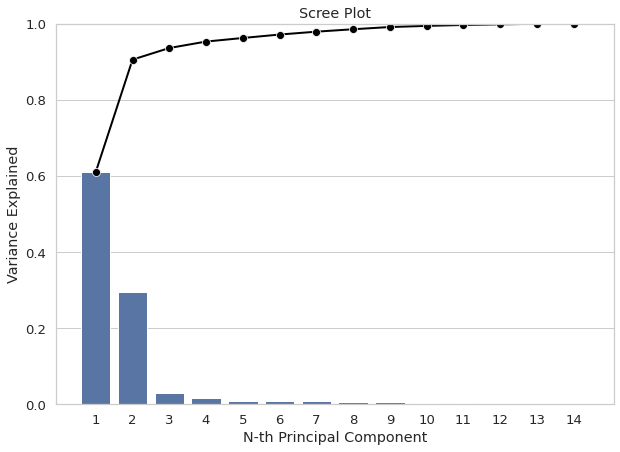

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


Los primeros **3 componentes principales** captan el **93%** de la variación total de las variables de la matriz ndf sin valores categóricos.

In [ ]:
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]+pcsSummary_df.iloc[1][2]
#OR
((pcsSummary_df.iloc[2][2])*100).round(0)
#type(pcsSummary_df)

94.0

### Con los **primeros 6** componentes principales se capturan el **98%** de la variación.

In [ ]:
# Suma de captura de información en componentes
#pcsSummary_df.iloc[1][0]+pcsSummary_df.iloc[1][1]
#OR
((pcsSummary_df.iloc[2][5])*100).round(2)

97.17

In [ ]:
# Se le da formato al data frame con la información de componentes principales
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,166526.3231,115824.3723,37236.4283,27730.3966,20686.6242,20266.0848,18511.5323,17030.1453,16283.1702,11608.9772,10409.1197,8782.3121,8198.2413,9.1284
Proportion of variance,0.6105,0.2953,0.0305,0.0169,0.0094,0.0090,0.0075,0.0064,0.0058,0.0030,0.0024,0.0017,0.0015,0.0000
Cumulative proportion,0.6105,0.9058,0.9363,0.9532,0.9627,0.9717,0.9792,0.9856,0.9915,0.9944,0.9968,0.9985,1.0000,1.0000


In [ ]:
pcs.components_

array([[ 4.91580908e-01,  5.56976379e-06,  3.88452058e-01,
         3.81355647e-01,  3.72186643e-01,  3.46408073e-01,
         3.22925051e-01,  3.08568962e-01,  2.65719855e-02,
         3.12870305e-02,  2.68182892e-02,  2.21697040e-02,
         2.22045477e-02,  2.48098902e-02],
       [ 8.69029069e-01,  8.27792273e-06, -2.21357433e-01,
        -2.26378765e-01, -2.16514535e-01, -1.94039459e-01,
        -1.76768081e-01, -1.67383950e-01,  5.71449210e-03,
         1.07819389e-02,  1.09538993e-02,  1.03613893e-02,
         1.16820179e-02,  1.53330045e-02],
       [-2.05780808e-02, -4.19144464e-06, -5.48963498e-01,
        -3.90932449e-01, -4.81031733e-02,  2.61032796e-01,
         4.28092113e-01,  4.83650660e-01,  3.75505330e-02,
         1.60027500e-01,  1.35126012e-01,  9.43962066e-02,
         5.59349537e-02, -2.09127072e-02],
       [-1.84301466e-02, -3.25790015e-07, -2.04984691e-01,
        -3.76280772e-02,  5.53489475e-01,  7.91028963e-02,
        -2.00118070e-01, -3.08449543e-01,  1.

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = ndf.columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
X1,0.491581,0.869029,-0.020578,-1.843015e-02,-0.044112
X5,0.000006,0.000008,-0.000004,-3.257900e-07,-0.000005
X12,0.388452,-0.221357,-0.548963,-2.049847e-01,0.316879
X13,0.381356,-0.226379,-0.390932,-3.762808e-02,0.011528
X14,0.372187,-0.216515,-0.048103,5.534895e-01,-0.248018
X15,0.346408,-0.194039,0.261033,7.910290e-02,-0.367199
X16,0.322925,-0.176768,0.428092,-2.001181e-01,-0.015710
X17,0.308569,-0.167384,0.483651,-3.084495e-01,0.226369
X18,0.026572,0.005714,0.037551,1.936179e-01,0.202799
X19,0.031287,0.010782,0.160028,6.731597e-01,0.337227


In [ ]:
ndf.columns

Index(['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23'],
      dtype='object')

In [ ]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = ndf.columns
                                )
pcsComponents_dfX

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,0.491581,0.869029,-0.020578,-1.843015e-02,-0.044112,0.016853,-0.001132,0.001016,0.009457,3.758564e-03,0.005845,0.000013,1.892671e-03,-1.036182e-05
X5,0.000006,0.000008,-0.000004,-3.257900e-07,-0.000005,0.000002,-0.000002,-0.000002,0.000007,3.134474e-08,0.000005,-0.000009,-9.440764e-07,1.000000e+00
X12,0.388452,-0.221357,-0.548963,-2.049847e-01,0.316879,0.003230,-0.456269,0.007048,0.070246,1.724536e-01,-0.267215,-0.204830,-6.200088e-03,-2.933429e-06
X13,0.381356,-0.226379,-0.390932,-3.762808e-02,0.011528,-0.080811,0.526920,-0.065669,0.099378,8.110363e-03,0.350722,0.476687,1.667561e-02,9.622806e-07
X14,0.372187,-0.216515,-0.048103,5.534895e-01,-0.248018,0.295603,0.028780,0.081207,-0.108096,-3.365244e-01,0.151690,-0.441281,-8.333599e-02,-5.979989e-06
X15,0.346408,-0.194039,0.261033,7.910290e-02,-0.367199,-0.473702,-0.178388,-0.227992,-0.097322,-1.368067e-01,-0.374786,0.232576,3.196550e-01,4.128148e-06
X16,0.322925,-0.176768,0.428092,-2.001181e-01,-0.015710,-0.078428,-0.013679,0.480277,0.126279,1.008200e-01,-0.052978,0.093468,-6.051924e-01,2.077823e-06
X17,0.308569,-0.167384,0.483651,-3.084495e-01,0.226369,0.392160,0.077104,-0.262951,-0.105294,2.368632e-01,0.203462,-0.159068,3.656473e-01,1.853668e-07
X18,0.026572,0.005714,0.037551,1.936179e-01,0.202799,-0.228156,0.611516,-0.082113,0.171065,2.792634e-01,-0.470475,-0.396965,-1.754201e-02,-7.288101e-08
X19,0.031287,0.010782,0.160028,6.731597e-01,0.337227,0.108221,-0.254995,-0.004630,0.226414,3.581232e-01,0.023184,0.383867,4.762112e-02,3.511128e-06


Here, it is clear that: 
* the first principal component is dominated by the sodium content of the cereal: 
  * it has the highest (in this case, positive) weight (-0.980215). 
  * This means that the first principal component is in fact measuring how much sodium is in the cereal. 
  
* The second principal component seems to be measuring the amount of potassium. 


**Since both these variables are measured in `milligrams`, whereas the other nutrients are measured in `grams`, the scale is obviously leading to this result.** 

The variances of potassium and sodium are much larger than the variances of the other variables, and thus the total variance is dominated by these two variances. 
---
---
**Normalize before applying PCA!!!**

* Normalize and then performing PCA on the correlation matrix instead of the covariance matrix. 
* Using the correlation matrix means that you are operating on the normalized data. 

In [ ]:
from sklearn import preprocessing

#### Normalize the 13 variables due to the different scales of the variables and then perform PCA (or equivalently, we use PCA applied to the correlation matrix)

In [ ]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
ndfinal = df.copy()
VarCat = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'Y']
ndfinal = ndfinal.drop(columns=VarCat)
ndfinal

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29999,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [ ]:
pcs = PCA()
pcs.fit(preprocessing.scale(ndfinal)) 
                # Standardize a dataset along any axis.
                # Center to the mean and component wise scale to unit variance.


PCA()

In [ ]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4330,1.3100,1.0223,0.9618,0.9400,0.9342,0.8829,0.8524,0.8411,0.5142,0.2665,0.2027,0.1593,0.1525
Proportion of variance,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5454,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


In [ ]:
pcsSummary_df.iloc[2,8]

0.9696355620196744

---
# **R.1** 

* A partir de la tabla de desviación estandar y varianza obtenida, podemos identificar que necesitamos **9 componentes principales** para capturar el **90%** de la totalidad de la variabilidad. 
* Con los primeros **2 componentes principales** se logra capturar el **54%** de la totalidad de la variabilidad, esto significa que si se reducieran el número de variables principales a 2, se estaría perdiendo una gran cantidad de información. Al menos deberiamos quedarnos con los primeros **7 componentes principales** para capturar al menos el **80%** de la totalidad de la variabilidad.

* Para poder entender mejor los componentes principales y la relación que existe entre las variables/dimensiones y cada componente, se desarrolla la siguiente tabla, en la que se puede ver cómo para el primer componente las variable que aportan mayor cantidad de información son las relacionadas conel importe del estado de cuenta de los clientes en los últimos meses por mes.
---

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index = ndfinal.columns                                )
pcsComponents_df.iloc[:,:9]

# index=cereals_df.iloc[:, 3:].columns


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
X1,0.165483,0.300721,-0.378367,-0.200783,0.034763,-0.077947,0.111254,-0.053279,-0.821623
X5,0.032715,0.071147,-0.869959,0.338170,-0.038886,0.072254,-0.078727,0.029034,0.329878
X12,0.372419,-0.190879,-0.034254,-0.063949,0.041133,-0.044090,0.008146,0.009524,0.010317
X13,0.383236,-0.174682,-0.001679,0.007298,0.083068,-0.029030,-0.032274,-0.135564,0.017996
X14,0.388247,-0.126933,0.034779,0.060394,0.114161,0.098810,-0.121353,0.092674,-0.019373
X15,0.391544,-0.120431,0.034071,0.074763,0.028602,0.014422,0.126401,0.039361,0.018639
X16,0.388490,-0.105953,0.033801,0.039750,-0.106908,-0.099037,-0.007575,0.049855,0.023016
X17,0.380654,-0.094256,0.018626,-0.070263,-0.164914,0.069663,0.007949,0.000452,0.058765
X18,0.135198,0.383280,0.173759,0.361035,0.226258,0.039948,-0.200739,-0.749035,0.026445
X19,0.116819,0.408340,0.200212,0.346460,0.150535,0.407488,-0.279922,0.577088,-0.115223


In [ ]:
pcsComponents_df.PC1.idxmax()

'X15'

In [ ]:
pcsComponents_df.PC1.nlargest(3)

X15    0.391544
X16    0.388490
X14    0.388247
Name: PC1, dtype: float64

In [ ]:
pcsComponents_df.PC2.idxmin()

'X12'

In [ ]:
pcsComponents_df.PC2.nsmallest(3)

X12   -0.190879
X13   -0.174682
X14   -0.126933
Name: PC2, dtype: float64

---
# **PASO 2:** Interprete cada componente principal en términos de las variables originales
> * Examine la magnitud y la dirección de los coeficientes de las variables originales.
> * **Nota:** Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.
---

---
# **R.1** 

* Si se realiza un análisis sobre la información de componentes principales basado en las variables originales, podemos ver que principalmente los dos primeros componentes son los que captan la mayor cantidad de variabilidad del total de los datos. Lo anterior es debido principalmente para el componente principal PC1 por la información aportada por la variable X1 que es el monto del crédito otorgado, y debido al estado de cuenta de los meses anteriores.

* Cabe mencionar que la tabla de correlaciones inicial que nos dice la relación que existe entre las variables, nos dice que para la reducción de los componentes principales, solo lo podríamos realizar en el bloque de variables de color verde que muestran relación entre variables y que corresponden a X12 a X17, ya que son las que se muestran relacionadas.

---

---
# **PASO 3:** Identifique valores atípicos
> * Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.
---

---
---
# **Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook**


1.   ¿Cuál es el número de componentes mínimo y por qué?
> **R.** Con los primeros 4 componentes principales se logra recabar el 95% de la totalidad de variablilidad, por lo que sólo se perdería ese 5% de variabilidad al quitar las demás variables. Si quisieramos llegar a capturar el 99% de la variabilidad del total, tendriamos que quedarnos con las primeras 9 variables de las 14 númericas iniciales.

2.   ¿Cuál es la variación de los datos que representan esos componentes?
> **R.** A continuación se pueden ver el porcentaje que aporta cada uno de los componentes principales en la variación de los datos.
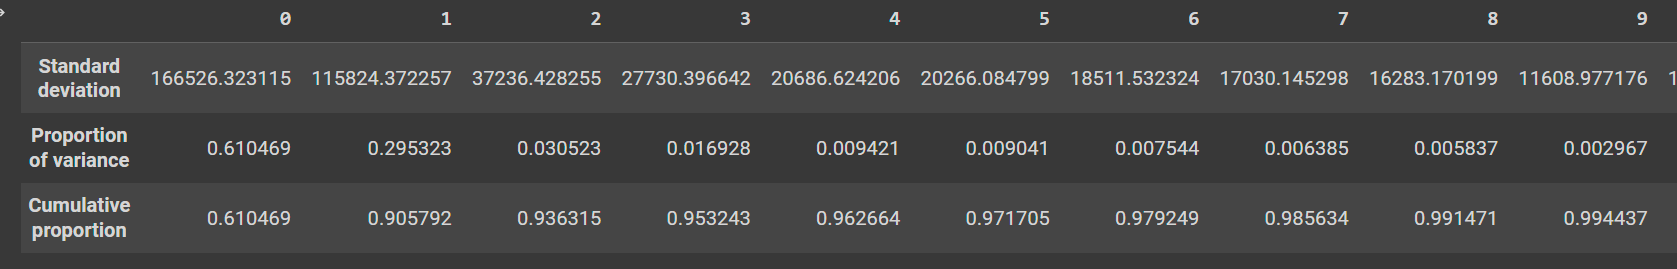

3.   ¿Cuál es la pérdida de información después de realizar PCA?
> **R.** De quedarnos con los primeros 4 componentes con los que logramos capturar el 95% de la variabilidad de los datos, estariamos perdiendo el 5% de dicha variabilidad.

4.   De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
> **R.** La variable X15 representa mayor importancia en los componentes principales y la variable X12 es la de menor importancia para los componentes principales.

5.   ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
> **R.** La utilización de PCA es benefica para el Machine Learning porque nos ayuda a simplificar la complejidad de los modelos matemáticos a implementar con la utilización de menos variables o dimensiones con el atributo de que se puede conservar su información sin pérdidas significativas.



---
---

In [ ]:
print('*'*55,'FIN','*'*55)

******************************************************* FIN *******************************************************
